In [1]:
inputdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentation/2404_D21-M3-S0-L8_6/"
segmentationdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/"
OUTPUT_DIR = "/group/jug/ashesh/naturemethods/segmentation/three_analysts/2404_D21-M3-S0-L8_6/"

In [2]:
from disentangle.core.tiff_reader import load_tiff
import os

ch_idx = 0  # which channel are we interested in doing segmentation.
crop_size = 1600  # because the prediction is for top left 1600x1600, we need to crop the GT to match the size.
gt = load_tiff(os.path.join(inputdir, "GT.tif"))[:, :crop_size, :crop_size, :]
pred = load_tiff(os.path.join(inputdir, "pred_disentangle_2404_D21-M3-S0-L8_6_1.tif"))
pred = pred[..., :crop_size, :crop_size]
pred.shape, gt.shape

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


((5, 2, 1600, 1600), (5, 1600, 1600, 3))

In [3]:
# gt = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/data_DDN/gt_ch2/GT-2.tif')
# gt_seg = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/data_DDN/gt_ch2/seg.tif')
# pred = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/data_DDN/pred_ch2/pred_ch2.tif')
# pred_seg = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/data_DDN/pred_ch2/seg.tif')


In [4]:
input = gt[..., 2]
gt_ch = gt[..., ch_idx]
pred_ch = pred[:, ch_idx]
raw_dict = {"input": input, "pred": pred_ch, "GT": gt_ch}


In [5]:
from collections import defaultdict


def load_segmentation():
    # 2 level nested dictionary
    segmentation = defaultdict(lambda: defaultdict(list))
    for analystdir in os.listdir(segmentationdir):
        if os.path.isdir(os.path.join(segmentationdir, analystdir)):
            for subdir in [f"gt_ch{ch_idx + 1}", "superimposed", f"pred_ch{ch_idx + 1}"]:
                fpath = os.path.join(segmentationdir, analystdir, subdir, "Seg.tif")
                assert os.path.exists(fpath), f"File {fpath} does not exist"
                if subdir.startswith("gt_ch"):
                    key = "GT"
                elif subdir.startswith("pred_ch"):
                    key = "pred"
                elif subdir.startswith("superimposed"):
                    key = "input"
                else:
                    raise ValueError(f"Unknown subdir {subdir}")
                segmentation[analystdir][key].append(load_tiff(fpath)[..., :crop_size, :crop_size])
                if key == "input":
                    if analystdir != "data_JD":
                        segmentation[analystdir][key][-1] = segmentation[analystdir][key][-1] == ch_idx + 1
                    else:
                        segmentation[analystdir][key][-1] = segmentation[analystdir][key][-1] == (2 * (ch_idx + 1) % 3)
                print(analystdir, key, segmentation[analystdir][key][-1].shape)
    return segmentation

In [6]:
seg_data = load_segmentation()
# seg_data['data_JD']['input'][0] = seg_data['data_JD']['input'][0][None]
analysts = list(seg_data.keys())
analysts

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_DDN GT (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_DDN input (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_DDN pred (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_JD GT (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_JD input (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_JD pred (5, 1600, 1600)
data_JMB GT (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_JMB input (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


data_JMB pred (5, 1600, 1600)


['data_DDN', 'data_JD', 'data_JMB']

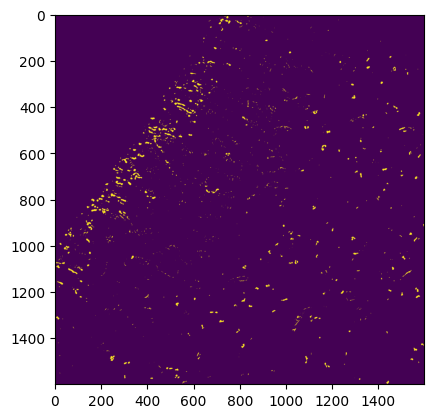

In [7]:
import matplotlib.pyplot as plt

plt.imshow(seg_data["data_JD"]["input"][0][0])

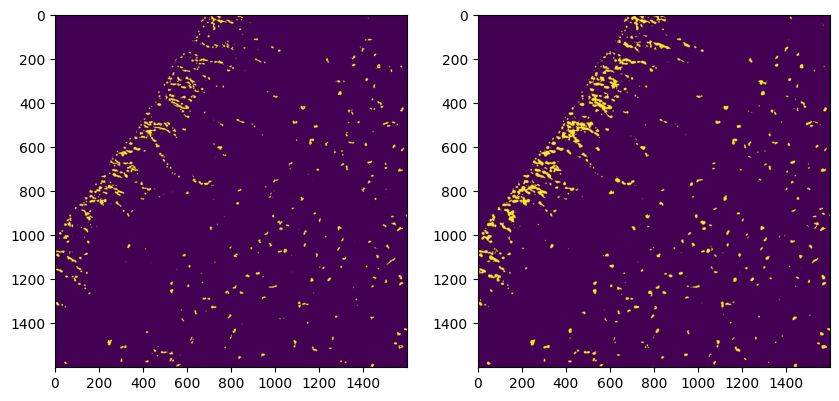

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 5), ncols=2)
i = 0
ax[0].imshow(seg_data["data_JD"]["GT"][0][i])
ax[1].imshow(seg_data["data_JMB"]["GT"][0][i])

(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)


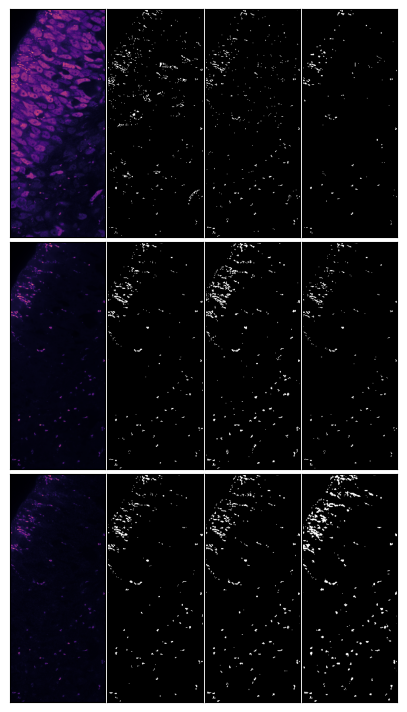

In [9]:
import matplotlib.pyplot as plt
from disentangle.analysis.plot_utils import clean_ax

ex_idx = 0
transpose = False
save_to_file = False


ncols = 4
nrows = 3
subres = 4
# how much do we want to reduce the width of the image
width_factor = 5 / 12
new_w = int(gt.shape[-2] * width_factor)
new_w += (gt.shape[-2] - new_w) % 2
extra_w = (gt.shape[-2] - new_w) // 2
imgsz = 3
_, ax = plt.subplots(figsize=(ncols * imgsz * width_factor, nrows * imgsz), ncols=ncols, nrows=nrows)

for d_idx, datatype in enumerate(["input", "pred", "GT"]):
    raw_img = raw_dict[datatype][ex_idx]
    if transpose:
        raw_img = raw_img.T
    ax[d_idx, 0].imshow(raw_img[:, extra_w:-extra_w][::subres, ::subres], cmap="magma")
    for a_idx, analyst in enumerate(analysts):
        seg_img = seg_data[analyst][datatype][0][ex_idx]
        print(seg_img.shape)
        if transpose:
            seg_img = seg_img.T
        ax[d_idx, 1 + a_idx].imshow(seg_img[:, extra_w:-extra_w][::subres, ::subres], cmap="gray")
        # ax[d_idx, 1+a_idx].set_title(f'{analyst} {datatype}')

clean_ax(ax)
# remove subspaces between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
if save_to_file:
    model_token = os.path.basename(inputdir.strip("/"))
    fname = f"segmentation_3analyst_Idx{ex_idx}_{model_token}.png"
    fpath = os.path.join(OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=100, bbox_inches="tight")


## Single reviewer prediction

In [10]:
import numpy as np


def dice_coefficient(x, y):
    assert set(np.unique(x)) == set([0, 1])
    assert set(np.unique(y)) == set([0, 1])
    intersection = np.sum(x[y == 1])
    union = np.sum(x) + np.sum(y)
    return 2 * intersection / union


def add_text(ax, text, img_shape, place="TOP_LEFT"):
    """
    Adding text on image
    """
    assert place in ["TOP_LEFT", "BOTTOM_RIGHT"]
    if place == "TOP_LEFT":
        ax.text(20, 40, text, bbox=dict(facecolor="white", alpha=0.9))
    elif place == "BOTTOM_RIGHT":
        s0 = img_shape[1]
        s1 = img_shape[0]
        ax.text(s0 - s0 * 150 / 500, s1 - s1 * 35 / 500, text, bbox=dict(facecolor="white", alpha=0.9))


In [11]:
seg_data["data_JD"]["GT"][0].shape

(5, 1600, 1600)

In [12]:
for analyst in analysts:
    dice_gt_input = [
        dice_coefficient(seg_data[analyst]["GT"][0][idx], seg_data[analyst]["input"][0][idx])
        for idx in range(len(seg_data[analyst]["GT"][0]))
    ]
    dice_gt_pred = [
        dice_coefficient(seg_data[analyst]["GT"][0][idx], seg_data[analyst]["pred"][0][idx])
        for idx in range(len(seg_data[analyst]["GT"][0]))
    ]
    print("GT vs Input", analyst, dice_gt_input)
    print("GT vs Pred", analyst, dice_gt_pred)


GT vs Input data_DDN [np.float64(0.5562507884445566), np.float64(0.49834842834310067), np.float64(0.44786996403732515), np.float64(0.4178750160400359), np.float64(0.5015249863142254)]
GT vs Pred data_DDN [np.float64(0.778184352674682), np.float64(0.7526561003222154), np.float64(0.69954324195046), np.float64(0.5911474102408838), np.float64(0.6788002866209438)]
GT vs Input data_JD [np.float64(0.5892076785431705), np.float64(0.5942583033018408), np.float64(0.6053060217176703), np.float64(0.5857894467998161), np.float64(0.5728568261071133)]
GT vs Pred data_JD [np.float64(0.8151098876056261), np.float64(0.7943745831367637), np.float64(0.7674278846153846), np.float64(0.7623930627979919), np.float64(0.7670516703324544)]
GT vs Input data_JMB [np.float64(0.36911562336029463), np.float64(0.2802964746604462), np.float64(0.15739229147521488), np.float64(0.0950712342662179), np.float64(0.10189132144187393)]
GT vs Pred data_JMB [np.float64(0.5020840950639853), np.float64(0.5407864601529444), np.floa

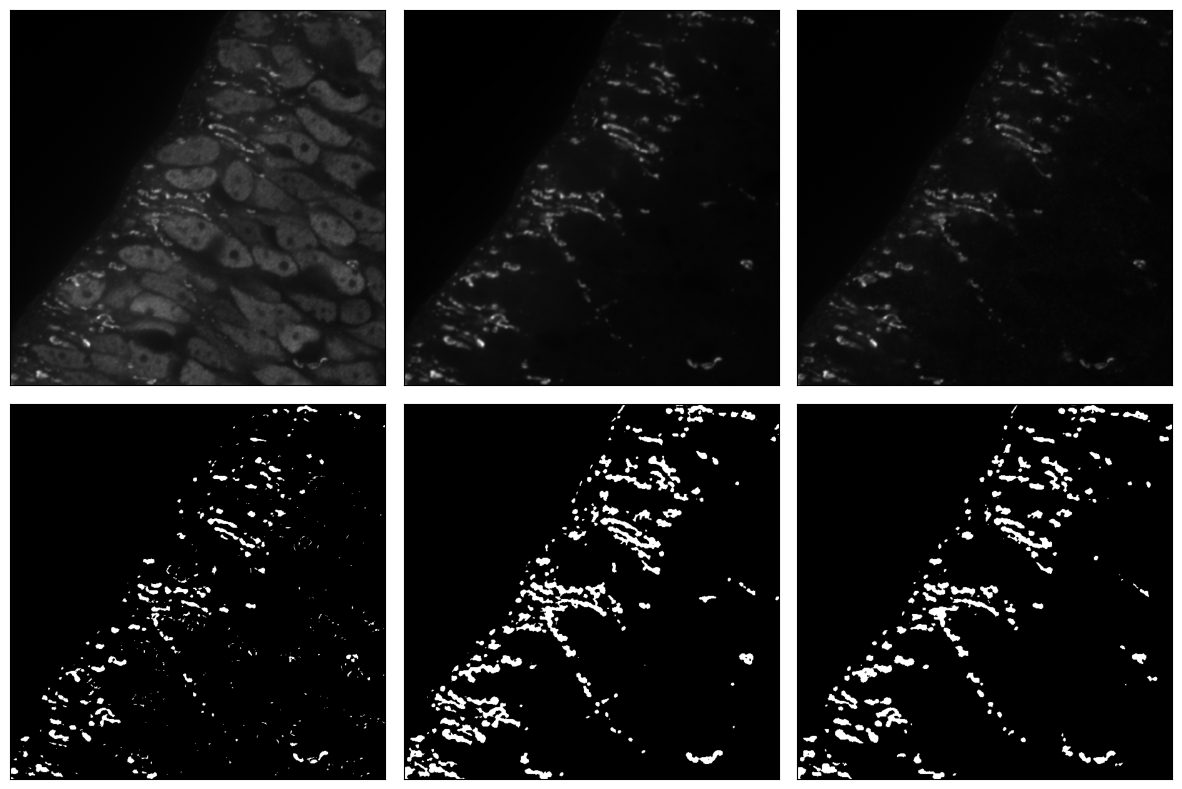

In [13]:
from disentangle.analysis.plot_utils import clean_ax
import matplotlib.pyplot as plt

OneAnalyst_OUTPUT_DIR = OUTPUT_DIR.replace("three_analysts", "one_analyst")
img_idx = 0
reviewer_key = "data_JD"
seg_input = seg_data[reviewer_key]["input"][0][img_idx]
seg_pred = seg_data[reviewer_key]["pred"][0][img_idx]
seg_GT = seg_data[reviewer_key]["GT"][0][img_idx]

img_size = 5
hs = 200
he = 800

ws = 200
we = 800
save_to_file = False

_, ax = plt.subplots(figsize=(3 * img_size, 2 * img_size), ncols=3, nrows=2)
ax[0, 0].imshow(raw_dict["input"][img_idx][hs:he, ws:we], cmap="gray")
ax[0, 1].imshow(raw_dict["pred"][img_idx][hs:he, ws:we], cmap="gray")
ax[0, 2].imshow(raw_dict["GT"][img_idx][hs:he, ws:we], cmap="gray")
ax[1, 0].imshow(seg_input[hs:he, ws:we], cmap="gray")
ax[1, 1].imshow(seg_pred[hs:he, ws:we], cmap="gray")
ax[1, 2].imshow(seg_GT[hs:he, ws:we], cmap="gray")

# dice_input = dice_coefficient(seg_GT.flatten() > 0, seg_input.flatten() >0)
# dice_pred = dice_coefficient(seg_GT.flatten() > 0, seg_pred.flatten() >0)
# add_text(ax[1,0], f'DICE: {dice_input:.2f}', seg_input.shape, place='TOP_LEFT')
# add_text(ax[1,1], f'DICE: {dice_pred:.2f}', seg_input.shape, place='TOP_LEFT')


clean_ax(ax)
# remove the space between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
if save_to_file:
    model_token = os.path.basename(inputdir.strip("/"))
    fname = f"segmentation_1analyst_reviewer:{reviewer_key}_Imgidx:{img_idx}_{model_token}_{hs}-{he}-{ws}-{we}.png"
    fpath = os.path.join(OneAnalyst_OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=100, bbox_inches="tight")


In [14]:
dice_score_dict = {}
reviewers = ["data_DDN", "data_JMB", "data_JD"]
for review in reviewers:
    reviewer_seg = seg_data[review]
    gt_seg = reviewer_seg["GT"][0]
    pred_seg = reviewer_seg["pred"][0]
    input_seg = reviewer_seg["input"][0]
    dice_scores_pred = [dice_coefficient(gt.flatten() > 0, pred.flatten() > 0) for gt, pred in zip(gt_seg, pred_seg)]
    dice_scores_input = [
        dice_coefficient(gt.flatten() > 0, input.flatten() > 0) for gt, input in zip(gt_seg, input_seg)
    ]

    dice_score_dict[review] = {"pred": dice_scores_pred, "input": dice_scores_input}

In [15]:
import pandas as pd

pred_df = pd.DataFrame.from_dict({r: dice_score_dict[r]["pred"] for r in reviewers})
avg_pred = pred_df.mean(axis=0)
stderr_pred = pred_df.std(axis=0) / np.sqrt(pred_df.shape[0])

inp_df = pd.DataFrame.from_dict({r: dice_score_dict[r]["input"] for r in reviewers})
avg_inp = inp_df.mean(axis=0)
stderr_inp = inp_df.std(axis=0) / np.sqrt(inp_df.shape[0])

(0.0, 1.1)

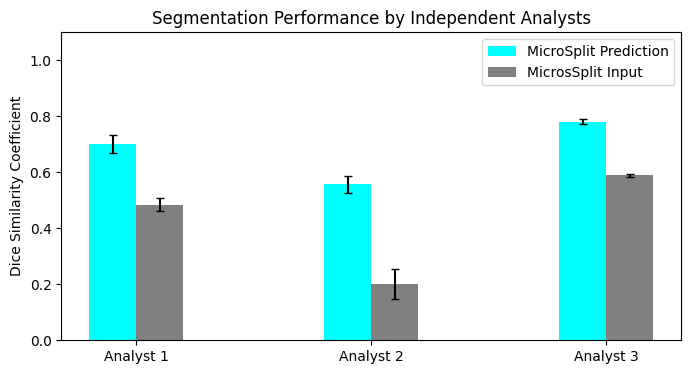

In [16]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8, 4))
labels = avg_pred.index
x = np.arange(len(labels)) / 2
width = 0.1

rects1 = ax.bar(
    x - width / 2,
    avg_pred,
    width,
    label="MicroSplit Prediction",
    yerr=stderr_pred,
    capsize=3,
    color="cyan",
    ecolor="black",
)
rects2 = ax.bar(
    x + width / 2, avg_inp, width, label="MicrosSplit Input", yerr=stderr_inp, capsize=3, color="grey", ecolor="black"
)

ax.set_ylabel("Dice Similarity Coefficient")
ax.set_title("Segmentation Performance by Independent Analysts")
ax.set_xticks(x)
ax.set_xticklabels(["Analyst 1", "Analyst 2", "Analyst 3"])
ax.legend(loc="upper right")
ax.set_ylim([0, 1.1])


In [17]:
import pandas as pd

dice_GT_score_dict = {}
for i1, an1 in enumerate(analysts):
    for i2, an2 in enumerate(analysts[i1 + 1 :]):
        if an1 == an2:
            continue

        assert len(seg_data[an1]["GT"]) == 1
        gt_seg1 = seg_data[an1]["GT"][0]
        gt_seg2 = seg_data[an2]["GT"][0]
        print(an1, an2)
        dice_GT_score_dict[f"A{i1}-A{i1 + i2 + 1}"] = [
            dice_coefficient(gt1.flatten() > 0, gt2.flatten() > 0) for gt1, gt2 in zip(gt_seg1, gt_seg2)
        ]
inter_reviewer_variability_df = pd.DataFrame.from_dict(dice_GT_score_dict)

data_DDN data_JD
data_DDN data_JMB
data_JD data_JMB


In [18]:
pred_df.columns = [f"A{i}" for i in range(3)]
pred_df

,A0,A1,A2
0,0.778184,0.502084,0.815110
1,0.752656,0.540786,0.794375
2,0.699543,0.615193,0.767428
3,0.591147,0.490475,0.762393
4,0.678800,0.639820,0.767052


/tmp/ipykernel_17442/3218218161.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(data=boxplot_df, ax=ax, color="0.95", palette=colors, width=0.4)


/group/jug/ashesh/naturemethods/segmentation/one_analyst/2404_D21-M3-S0-L8_6/segmentation_3analyst_quantitative_2404_D21-M3-S0-L8_6.pdf


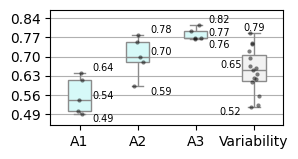

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

save_to_file = True

df = pred_df[["A1", "A0", "A2"]].copy()
df.columns = ["A1", "A2", "A3"]
variability_df = pd.Series(
    inter_reviewer_variability_df.values.reshape(
        -1,
    )
).to_frame("Variability")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(3, 1.5))
# fig, ax = plt.subplots(figsize=(4, 1.5))

# Create the boxplot
colors = ["#D0FFFD", "#D0FFFD", "#D0FFFD", "0.95"]
boxplot_df = pd.concat([df, variability_df], axis=1)
bp = sns.boxplot(data=boxplot_df, ax=ax, color="0.95", palette=colors, width=0.4)
# show values for min, max, mean for each box. it should be right side of each box
for i, col in enumerate(boxplot_df.columns):
    col_data = boxplot_df[col]
    min_val = col_data.min()
    max_val = col_data.max()
    median_val = col_data.median()
    if i == 3:
        ax.text(i - 0.4, min_val, f"{min_val:.2f}", ha="center", va="top", fontsize=7)
        ax.text(i, max_val, f"{max_val:.2f}", ha="center", va="bottom", fontsize=7)
        ax.text(i - 0.4, median_val, f"{median_val:.2f}", ha="center", va="bottom", fontsize=7)
    else:
        ax.text(i + 0.4, min_val, f"{min_val:.2f}", ha="center", va="top", fontsize=7)
        ax.text(i + 0.4, max_val, f"{max_val:.2f}", ha="center", va="bottom", fontsize=7)
        ax.text(i + 0.4, median_val, f"{median_val:.2f}", ha="center", va="bottom", fontsize=7)

# Create the scatter plot (strip plot) on top of the boxplot
sns.stripplot(data=pd.concat([df, variability_df], axis=1), ax=ax, color="black", jitter=True, size=3, alpha=0.5)

# enable fine grid lines in y axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.07))

ax.yaxis.grid(True)

plt.ylim(0.45, 0.87)

# Show the plot
if save_to_file:
    model_token = os.path.basename(inputdir.strip("/"))
    fname = f"segmentation_3analyst_quantitative_{model_token}.pdf"
    fpath = os.path.join(OneAnalyst_OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=200, bbox_inches="tight")

/group/jug/ashesh/naturemethods/segmentation/one_analyst/2404_D21-M3-S0-L8_6/segmentation_3analyst_quantitative_2404_D21-M3-S0-L8_6.pdf


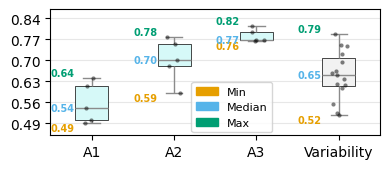

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

save_to_file = True
df = pred_df[["A1", "A0", "A2"]].copy()
df.columns = ["A1", "A2", "A3"]
variability_df = pd.Series(
    inter_reviewer_variability_df.values.reshape(
        -1,
    )
).to_frame("Variability")

# Colorblind-friendly colors (viridis-inspired)
MIN_COLOR = "#E69F00"  # (orange)
MEDIAN_COLOR = "#56B4E9"  # (sky blue)  # Teal
MAX_COLOR = "#009E73"  # (bluish green)  # Dark green

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 1.8))

# Create the boxplot
colors = ["#D0FFFD", "#D0FFFD", "#D0FFFD", "0.95"]
boxplot_df = pd.concat([df, variability_df], axis=1)
bp = sns.boxplot(data=boxplot_df, ax=ax, palette=colors, width=0.4)

# Style boxplots
for patch in bp.patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor("black")

# Show values for min, max, median for each box (right side)
for i, col in enumerate(boxplot_df.columns):
    col_data = boxplot_df[col]
    min_val = col_data.min()
    max_val = col_data.max()
    median_val = col_data.median()

    x_pos = i - 0.35
    # Min (deep purple)
    ax.text(x_pos, min_val, f"{min_val:.2f}", ha="center", va="top", fontsize=7, color=MIN_COLOR, fontweight="bold")
    # Max (yellow)
    ax.text(x_pos, max_val, f"{max_val:.2f}", ha="center", va="bottom", fontsize=7, color=MAX_COLOR, fontweight="bold")
    # Median (teal)
    ax.text(
        x_pos,
        median_val,
        f"{median_val:.2f}",
        ha="center",
        va="center",
        fontsize=7,
        color=MEDIAN_COLOR,
        fontweight="bold",
    )

# Create the scatter plot
sns.stripplot(data=pd.concat([df, variability_df], axis=1), ax=ax, color="black", jitter=True, size=3, alpha=0.5)

# Colorblind-friendly legend
legend_elements = [
    mpatches.Patch(color=MIN_COLOR, label="Min"),
    mpatches.Patch(color=MEDIAN_COLOR, label="Median"),
    mpatches.Patch(color=MAX_COLOR, label="Max"),
]

# Legend outside plot
# ax.legend(handles=legend_elements, loc="lower center", fontsize=8, frameon=True)
ax.legend(
    handles=legend_elements,
    loc="lower center",
    bbox_to_anchor=(0.55, -0.02),  # x>0.5 shifts right, tweak values as needed
    fontsize=8,
    frameon=True,
)

# Formatting
ax.yaxis.set_major_locator(plt.MultipleLocator(0.07))
ax.yaxis.grid(True, alpha=0.3)
plt.ylim(0.45, 0.87)

plt.tight_layout()
if save_to_file:
    model_token = os.path.basename(inputdir.strip("/"))
    fname = f"segmentation_3analyst_quantitative_{model_token}.pdf"
    fpath = os.path.join(OneAnalyst_OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=200, bbox_inches="tight", pad_inches=0.1)
# if save_to_file:
#     plt.savefig(
#         "boxplot_colorblind.png", dpi=300, bbox_inches="tight", bbox_extra_artists=(ax.get_legend(),), pad_inches=0.1
#     )
plt.show()
